# Exercises

In [1]:
import matplotlib.pyplot as plt
import os
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import acquire

Using your store items data:

In [2]:
df = acquire.get_store_item_demand_data()
df

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,50,63.0,"Wed, 27 Dec 2017 00:00:00 GMT",912996,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912996,50,59.0,"Thu, 28 Dec 2017 00:00:00 GMT",912997,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912997,50,74.0,"Fri, 29 Dec 2017 00:00:00 GMT",912998,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912998,50,62.0,"Sat, 30 Dec 2017 00:00:00 GMT",912999,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221


In [3]:
df.dtypes

item_id            int64
sale_amount      float64
sale_date         object
sale_id            int64
store_id           int64
store_address     object
store_city        object
store_state       object
store_zipcode      int64
item_brand        object
item_name         object
item_price       float64
item_upc12         int64
item_upc14         int64
dtype: object

1. Convert date column to datetime format.

In [4]:
# convert our date column to datetime type
df.sale_date = pd.to_datetime(df.sale_date)
df.dtypes

item_id                        int64
sale_amount                  float64
sale_date        datetime64[ns, UTC]
sale_id                        int64
store_id                       int64
store_address                 object
store_city                    object
store_state                   object
store_zipcode                  int64
item_brand                    object
item_name                     object
item_price                   float64
item_upc12                     int64
item_upc14                     int64
dtype: object

2. Plot the distribution of sale_amount and item_price.

<AxesSubplot:>

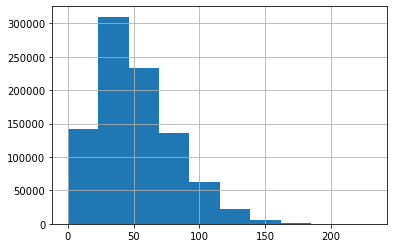

In [5]:
df['sale_amount'].hist()


<AxesSubplot:>

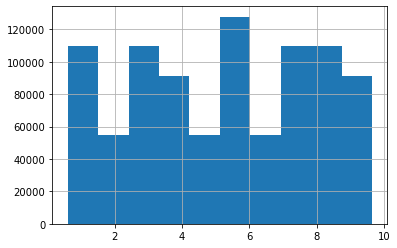

In [6]:
df['item_price'].hist()



In [7]:
# printing all columns of the dataframe
print(df.columns.tolist())

['item_id', 'sale_amount', 'sale_date', 'sale_id', 'store_id', 'store_address', 'store_city', 'store_state', 'store_zipcode', 'item_brand', 'item_name', 'item_price', 'item_upc12', 'item_upc14']


3. Set the index to be the datetime variable.

In [8]:
df = df.set_index('sale_date').sort_index()
df

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,34,21.0,619014,9,735 SW Military Dr,San Antonio,TX,78221,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694
2017-12-31 00:00:00+00:00,34,32.0,620840,10,8503 NW Military Hwy,San Antonio,TX,78231,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694
2017-12-31 00:00:00+00:00,35,55.0,622666,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066


4. Add a 'month' and 'day of week' column to your dataframe.

In [9]:
# printing all columns of the dataframe
print(df.columns.tolist())

['item_id', 'sale_amount', 'sale_id', 'store_id', 'store_address', 'store_city', 'store_state', 'store_zipcode', 'item_brand', 'item_name', 'item_price', 'item_upc12', 'item_upc14']


In [10]:

df['month'] = pd.to_datetime(df.index).dt.month
df['day_of_week'] = pd.to_datetime(df.index).dt.day

df

AttributeError: 'DatetimeIndex' object has no attribute 'dt'

5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

# Data Splitting